In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime

In [2]:
ds_currency = pd.read_csv("csvfiles/환율.csv", parse_dates = ["APPL_DATE"])
ds_currency.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294


In [7]:
ds_currency

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294
5,USD,2016-01-02,1178.00,1.0000
6,CNY,2016-01-03,181.48,0.1541
7,JPY,2016-01-03,976.99,0.8294
8,USD,2016-01-03,1178.00,1.0000
9,CNY,2016-01-04,181.10,0.1540


In [4]:
ds_currency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 4 columns):
CURRENCY         273 non-null object
APPL_DATE        273 non-null datetime64[ns]
STD_RATE         273 non-null float64
USD_CONV_DATE    273 non-null float64
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 8.6+ KB


In [22]:
ds_currency

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294
5,USD,2016-01-02,1178.00,1.0000
6,CNY,2016-01-03,181.48,0.1541
7,JPY,2016-01-03,976.99,0.8294
8,USD,2016-01-03,1178.00,1.0000
9,CNY,2016-01-04,181.10,0.1540


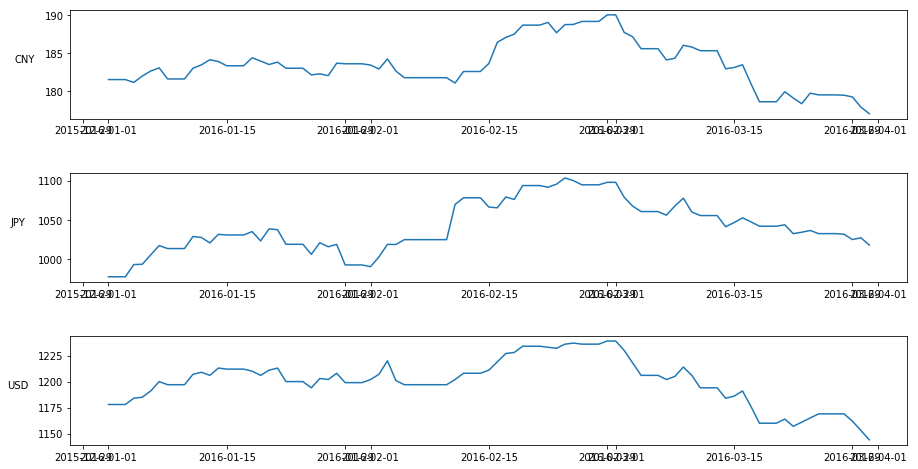

In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, ncols = 1, figsize=(15,8))
for (ax, idx, currency,date) in zip([ax1, ax2, ax3], [311, 312, 313], ["CNY","JPY","USD"],ds_currency['APPL_DATE'].values):
    #plot 추가
    ax.plot("APPL_DATE", "STD_RATE", data = ds_currency[ds_currency["CURRENCY"]== currency])
    ax.set_ylabel(currency, rotation = 0, labelpad = 20)
#     ax.set_xlabel(date,rotation=50, fontsize="small")
fig.subplots_adjust(hspace = 0.5, wspace=0.3)    

In [12]:
ds_currency_CNY = ds_currency[ds_currency["CURRENCY"]=="CNY"].set_index("APPL_DATE")
ds_currency_CNY.drop(["CURRENCY","USD_CONV_DATE"], axis = 1, inplace =True)
ds_currency_JPY = ds_currency[ds_currency["CURRENCY"]=="JPY"].set_index("APPL_DATE")
ds_currency_JPY.drop(["CURRENCY","USD_CONV_DATE"], axis = 1, inplace =True)
ds_currency_USD = ds_currency[ds_currency["CURRENCY"]=="USD"].set_index("APPL_DATE")
ds_currency_USD.drop(["CURRENCY","USD_CONV_DATE"], axis = 1, inplace =True)
ds_currency_CNY.head()

,STD_RATE
APPL_DATE,
2016-01-01,181.48
2016-01-02,181.48
2016-01-03,181.48
2016-01-04,181.10
2016-01-05,181.94


### 시계열 분석 : 데이터 분할 - 차분을 통하여 정상성 데이터로 변환

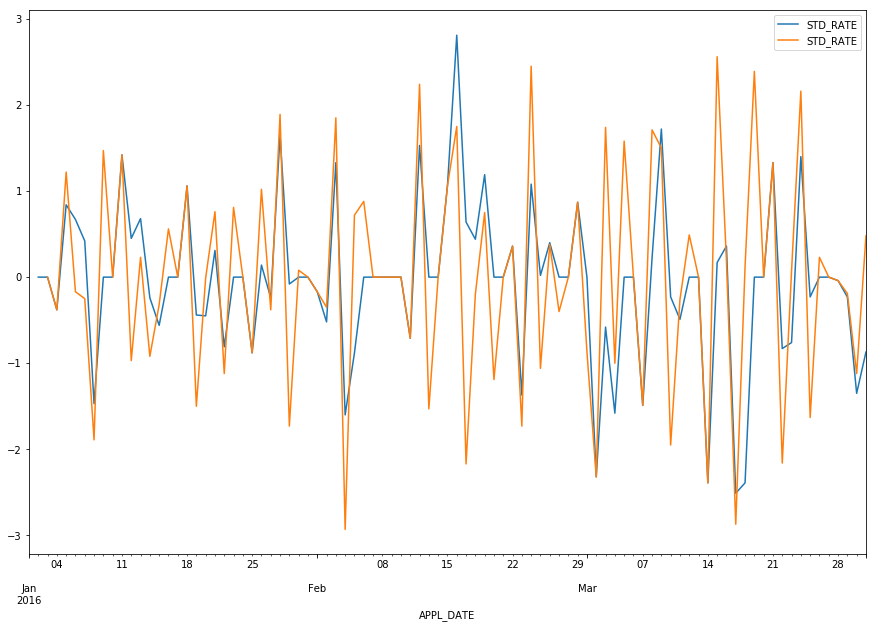

In [17]:
plt.figure(figsize=(15,10))
#shift(n): 앞의 z번 째 데이터를 가져옴
ds_cny_diff1 = ds_currency_CNY["STD_RATE"] - ds_currency_CNY["STD_RATE"].shift(1)
ds_cny_diff1.plot(legend=True)

#2번 차분 : (z(t)-z(t-1)-(z(t-1)-z(t-2)) = z(t) - 2* z(t-1) + z(t-2)
ds_cny_diff2 = ds_currency_CNY["STD_RATE"] - 2*(ds_currency_CNY["STD_RATE"].shift(1)) + (ds_currency_CNY["STD_RATE"].shift(2))
ds_cny_diff2.plot(legend=True)


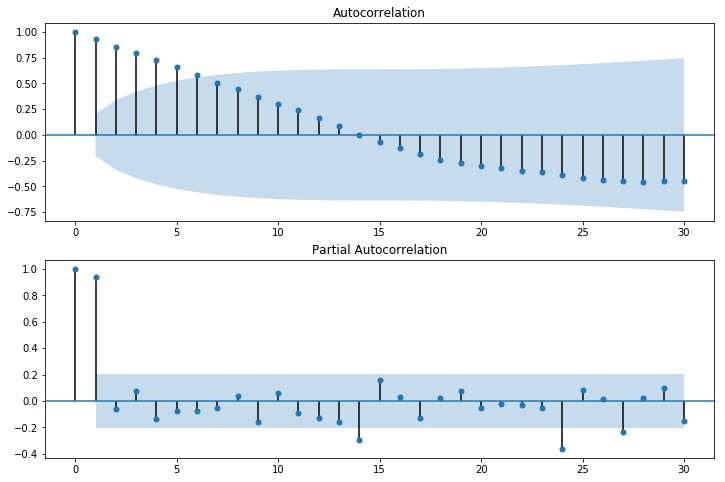

In [29]:
lag_size= 30
fig = plt.figure(figsize= (12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(ds_currency_CNY["STD_RATE"], lags = lag_size, ax = ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(ds_currency_CNY["STD_RATE"], lags = lag_size, ax=ax2)



### 시계열 분석

In [30]:
ts_model_cny = ARIMA(ds_currency_CNY, order = (1,2,0))
ts_result_cny = ts_model_cny.fit(trend='c', full_output=True, disp= 1)
print(ts_result_cny.summary())


                             ARIMA Model Results                              
Dep. Variable:            D2.STD_RATE   No. Observations:                   89
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -135.890
Method:                       css-mle   S.D. of innovations              1.113
Date:                Wed, 30 Jan 2019   AIC                            277.779
Time:                        17:47:47   BIC                            285.245
Sample:                    01-03-2016   HQIC                           280.788
                         - 03-31-2016                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0115      0.083     -0.138      0.890      -0.174       0.151
ar.L1.D2.STD_RATE    -0.4273      0.095     -4.501      0.000      -0.613      -0.241
                        

/home/pirl/anaconda3/envs/py36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/pirl/anaconda3/envs/py36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
/home/pirl/anaconda3/envs/py36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


/home/pirl/anaconda3/envs/py36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


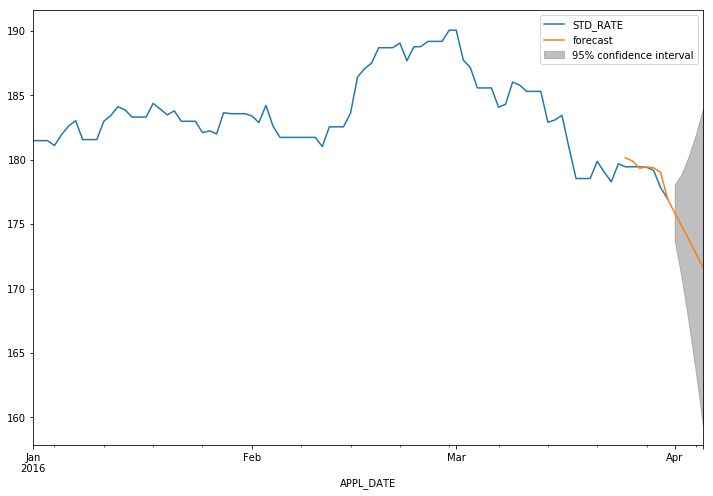

In [31]:
start_time = datetime.strptime("2016-03-25T00:00:00", "%Y-%m-%dT%H:%M:%S")
end_time = datetime.strptime("2016-04-05T00:00:00", "%Y-%m-%dT%H:%M:%S")
fig, ax = plt.subplots(figsize = (12,8))
ax = ds_currency_CNY.plot(ax = ax)
fig = ts_result_cny.plot_predict(start=start_time, end= end_time, ax=ax, plot_insample=False)